In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pickle

%matplotlib inline

In [2]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [3]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [4]:
# !nvidia-smi

In [5]:
# To display all columns:
pd.pandas.set_option('display.max_columns', None)

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# os.chdir(r'/content/drive/MyDrive/higgs boson/')

## Loding Data:

In [8]:
# For colab
# df1 = pd.read_csv('train_MICE_median_ind_QuantileTransformer.csv')
# df2 = pd.read_csv('train_MICE_med_ind_QT_dropOutlier.csv')

df1 = pd.read_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv')
df2 = pd.read_csv('../data/interim/train_MICE_med_ind_QT_dropOutlier.csv')

In [9]:
X, y = df1.drop(columns=['Weight', 'Label']), df1['Weight']
X2, y2 = df2.drop(columns=['Weight', 'Label']), df2['Weight']

In [10]:
print(df1.shape, df2.shape, sep='\n')

(250000, 33)
(236794, 33)


## Train-test split:

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30000)     # about 12%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=30000)   # about 12%

## Visualizing Weight column:

<AxesSubplot:xlabel='Weight', ylabel='Count'>

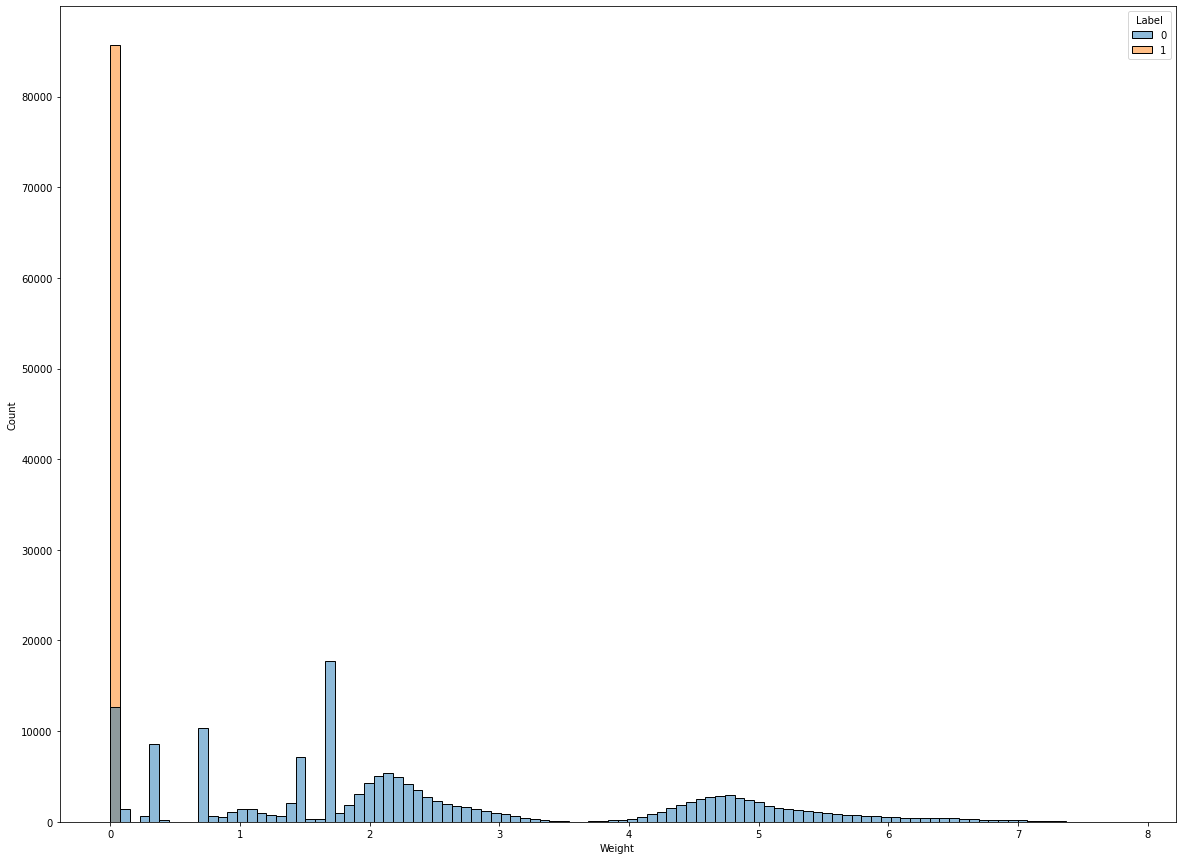

In [12]:
plt.figure(figsize=(20, 15))
sns.histplot(data=df1, x='Weight', hue='Label')

<AxesSubplot:xlabel='Weight', ylabel='Count'>

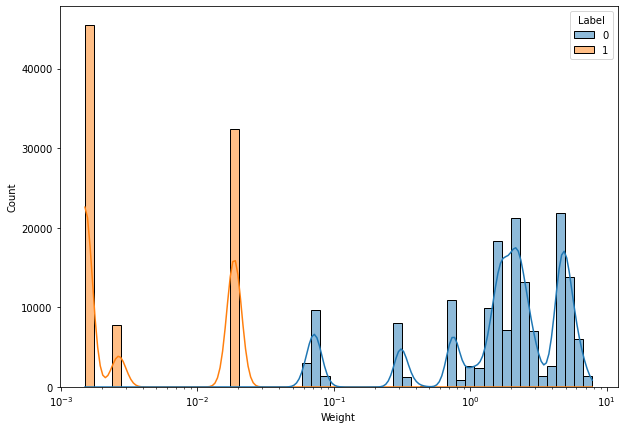

In [13]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df1, x='Weight', hue='Label', log_scale=True, kde=True)

## Grid Search CV:

In [14]:
# import pickle
# # Write the object to file
# with open('grid_search_info.pkl', 'wb') as f:
#     pickle.dump((t1, t2), f)

<b style="color: orange; font-size: 20px;"> Note:</b><br /> <p>Grid Search CV is turning out to be too computationally expensive. So going with `cross_val_score()` & manually saving the models.</p>

## Lazy Predict:

The below block of code almost took `8 hrs` in my local machine. Hopefully never doing it again!!!

In [15]:
# # Import libraries
# from lazypredict.Supervised import LazyRegressor

# # Defines and builds the lazyclassifier
# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
# models_train, predictions_train = reg.fit(X_train, X_train, y_train, y_train)
# models_test, predictions_test = reg.fit(X_train, X_test, y_train, y_test)

# # Prints the model performance
# models_train

f:\installationfolder\anaconda\envs\higgs_boson\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 26%|█████████████████████▍                                                            | 11/42 [08:02<23:10, 44.85s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 361. GiB for an array with shape (220000, 220000) and data type float64


 40%|███████████████████████████████▉                                               | 17/42 [48:44<3:21:34, 483.76s/it]

KernelRidge model failed to execute
Unable to allocate 361. GiB for an array with shape (220000, 220000) and data type float64


100%|████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 6022.38it/s]


tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to ex

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,18.00
ExtraTreeRegressor,1.00,1.00,0.00,3.65
ExtraTreesRegressor,1.00,1.00,0.00,275.63
RandomForestRegressor,0.95,0.95,0.43,1190.43
BaggingRegressor,0.93,0.93,0.51,107.54
KNeighborsRegressor,0.69,0.69,1.04,2180.56
XGBRegressor,0.67,0.67,1.07,49.92
LGBMRegressor,0.64,0.64,1.12,4.87
HistGradientBoostingRegressor,0.64,0.64,1.12,9.93


In [41]:
try:
    os.mkdir(r'../reports/lazypredict')
    os.mkdir(r'../reports/lazypredict/regg')
except FileExistsError as fee:
    print(fee)

[WinError 183] Cannot create a file when that file already exists: '../reports/lazypredict'


In [42]:
sub = str(time.localtime().tm_hour) + '_' + str(time.localtime().tm_min) \
    + '_' + str(time.localtime().tm_mday) + '_' + str(time.localtime().tm_mon) \
    + '_' + str(time.localtime().tm_year)
sub

'0_18_8_9_2021'

In [43]:
# Saving LazyPredict csv files & model for future refernce
models_train.to_csv(f"../reports/lazypredict/regg/train_{sub}.csv", index=False)
predictions_train.to_csv(f"../reports/lazypredict/regg/train_pred_{sub}.csv", index=False)
models_test.to_csv(f"../reports/lazypredict/regg/test_{sub}.csv", index=False)
predictions_test.to_csv(f"../reports/lazypredict/regg/test_pred_{sub}.csv", index=False)

# Saving lazypredict model
# The saved file is 3.57 GB & must be added in gitignore
with open(f'../reports/lazypredict/regg/Lazypredict_regg_model_{sub}.pkl', 'wb') as fptr:
    pickle.dump(reg, fptr)

## Cross Val Score:

In [26]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb

### Metrics:

In [16]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### SVR:

Use sorted(sklearn.metrics.SCORERS.keys()) to get valid scoring options.

In [18]:
dirPath = '../models/regg'
if not os.path.isdir(dirPath):
    os.mkdir(dirPath)

dirPath = '../models/regg/outlier_present'
if not os.path.isdir(dirPath):
    os.mkdir(dirPath)
    
def model_eval_and_save(model, save_path, cv=5, scoring='r2'): 
    
    
    ## Model 1
    start_time = time.time()   #returns in seconds
    scores = cross_val_score(model, X=X_train, y=y_train, cv=cv, n_jobs=4, scoring=scoring, verbose=1)
    stop_time = time.time()
    
    print('No outliers:')
    print('Time Taken = ',stop_time-start_time, '\nCross-Val scores', scores, '\n Mean =', scores.mean())
    save_path = save_path + str(abs(round(scores.mean() * 100))) + '.pkl'
    path = os.path.join('../models/regg', save_path)
    
    with open(path, 'wb') as f:
        pickle.dump((model, scores), f)
        
    
    ## Model 2
    start_time = time.time()   #returns in seconds
    scores = cross_val_score(model, X=X_train2, y=y_train2, cv=cv, n_jobs=4, scoring=scoring, verbose=1)
    stop_time = time.time()
    
    print('\n\nWith outliers:')
    print('Time Taken = ',stop_time-start_time, '\nCross-Val scores', scores, '\n Mean =', scores.mean())
    save_path = save_path + str(abs(round(scores.mean() * 100))) + '.pkl'
    path = os.path.join('../models/regg/outlier_present', save_path)
    
    with open(path, 'wb') as f:
        pickle.dump((model, scores), f)

In [21]:
svr_regg = SVR(kernel='rbf', gamma='scale', C=1, max_iter=5000, cache_size=2048, verbose=True)
model_eval_and_save(svr_regg, 'svr_rbf_C1_gamm_scale_')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 12.2min finished


No outliers:
Time Taken =  733.955518245697 
Cross-Val scores [0.13868801 0.15352692 0.16746265 0.07005819 0.14554902] 
 Mean = 0.13505695605045967


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 13.6min finished




With outliers:
Time Taken =  819.3875195980072 
Cross-Val scores [ 0.11570777  0.1288641  -0.01794811  0.09418688  0.09094798] 
 Mean = 0.08235172418421069


In [22]:
svr_regg.get_params()

{'C': 1,
 'cache_size': 2048,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 5000,
 'shrinking': True,
 'tol': 0.001,
 'verbose': True}

In [23]:
svr_regg = SVR(kernel='rbf', C=1, gamma=0.01, max_iter=5000, cache_size=2048, verbose=True)
model_eval_and_save(svr_regg, 'svr_rbf_C1_gamma_0.01_')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 13.8min finished


No outliers:
Time Taken =  826.846408367157 
Cross-Val scores [-0.03084286  0.00892738  0.15900785 -0.03585802  0.13097372] 
 Mean = 0.046441612353400184


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 13.0min finished




With outliers:
Time Taken =  783.3531200885773 
Cross-Val scores [ 0.14967399 -0.36038079 -0.25764948  0.0980446   0.06140217] 
 Mean = -0.06178190355074169


In [25]:
svr_regg = SVR(kernel='rbf', C=1, gamma=0.1, max_iter=5000, cache_size=2048, verbose=True)
model_eval_and_save(svr_regg, 'svr_rbf_C1_gamma_0.1_')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 21.8min finished


No outliers:
Time Taken =  1308.8693397045135 
Cross-Val scores [-0.11281205 -0.16048036 -0.17183194 -0.14068904 -0.17968873] 
 Mean = -0.1531004222273557


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 16.5min finished




With outliers:
Time Taken =  991.2918491363525 
Cross-Val scores [-0.07394985 -0.10213282 -0.17384107 -0.12228898 -0.17207099] 
 Mean = -0.1288567436793226


In [26]:
svr_regg = SVR(kernel='rbf', C=1, gamma=0.5, max_iter=5000, cache_size=2048, verbose=True)
model_eval_and_save(svr_regg, 'svr_rbf_C1_gamma_0.5_')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 21.2min finished


No outliers:
Time Taken =  1273.5208246707916 
Cross-Val scores [-0.2522309  -0.27800775 -0.29233762 -0.2589225  -0.26843484] 
 Mean = -0.26998672303366733


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 16.6min finished




With outliers:
Time Taken =  998.6097266674042 
Cross-Val scores [-0.23229521 -0.23860519 -0.23040999 -0.23329007 -0.25685807] 
 Mean = -0.23829170711106112


In [27]:
svr_regg = SVR(kernel='rbf', C=1, gamma=1, max_iter=5000, cache_size=2048, verbose=True)
model_eval_and_save(svr_regg, 'svr_rbf_C1_gamma_1_')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 16.5min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


No outliers:
Time Taken =  990.5140190124512 
Cross-Val scores [-0.35440475 -0.37695757 -0.36823149 -0.38489784 -0.37218779] 
 Mean = -0.37133588878247503


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 14.9min finished




With outliers:
Time Taken =  896.5695567131042 
Cross-Val scores [-0.32909969 -0.3336164  -0.33227034 -0.34422327 -0.33718871] 
 Mean = -0.3352796826519828


In [27]:
svr_regg = SVR(C=0.6, max_iter=5000, cache_size=2048, verbose=True)
model_eval_and_save(svr_regg, 'svr_rbf_C0.6_')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 12.3min finished


No outliers:
Time Taken =  739.4297578334808 
Cross-Val scores [0.18677919 0.11618343 0.13136201 0.10135648 0.14492388] 
 Mean = 0.13612099903813202


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.




With outliers:
Time Taken =  598.8150811195374 
Cross-Val scores [0.13968623 0.1963882  0.20289537 0.18391555 0.18343414] 
 Mean = 0.18126389792541128


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 10.0min finished


## Model creation function:

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

def grid_search_model(params, model, num=1):
    gs = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs = -1)
    if num ==1:
        gs.fit(X_train, y_train)
        
        train_pred = gs.predict(X_train)
        mse_train = mean_squared_error(y_train, train_pred)
        
        pred = gs.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        rsq = r2_score (y_test, pred)
    else:
        gs.fit(X_train2, y_train2)
        
        train_pred = gs.predict(X_train2)
        mse_train = mean_squared_error(y_train2, train_pred)
        
        pred = gs.predict(X_test2)
        mse = mean_squared_error(y_test2, pred)
        rsq = r2_score (y_test2, pred)
    
    df4 = pd.DataFrame(gs.cv_results_).sort_values(by='mean_test_score', ascending=False)
#     df4.head()

    print(gs.best_params_)
    print("Mse train - ", mse_train)
    print("r2 = ", gs.best_score_)
    print('\n\nTest score:\nMSE = {}\nr2 = {}'.format(mse, rsq))
    return gs, df4

### Decision Tree:

In [30]:
params = {
    'max_depth': np.arange(9, 12),
    'min_samples_split': [150, 200, 280],
    'max_features': [0.9],
    'min_samples_leaf': [100]
}

dt = DecisionTreeRegressor(criterion='friedman_mse')
dt_model1, df_dt_model1 = grid_search_model(params, dt)

{'max_depth': 11, 'max_features': 0.9, 'min_samples_leaf': 100, 'min_samples_split': 280}
0.5933631840345367
Mse train -  1.337113509165814


 Test score:
MSE = 1.4268537109619273
r2 = 0.5953758331383692


In [33]:
dt_model12, df_dt_model12 = grid_search_model(params, dt, 2)

{'max_depth': 11, 'max_features': 0.9, 'min_samples_leaf': 100, 'min_samples_split': 150}
Mse train -  1.334840888908467
r2 =  0.5893100154923031


 Test score:
MSE = 1.4310039546710132
r2 = 0.5918964740101245


## Random Forest:

In [35]:
params = {
    'max_depth': [5, 6, 7],
    'max_features': [0.9],
    'bootstrap': [True],
    'max_samples': [0.9],
    'warm_start': [False],
    'min_samples_split': [200],
    'min_samples_leaf': [80],
    'oob_score': [True],
}
rf1 = RandomForestRegressor(n_estimators=100, criterion='mse')
rf_model1, df_rf_model1 = grid_search_model(params, rf1)

{'bootstrap': True, 'max_depth': 7, 'max_features': 0.9, 'max_samples': 0.9, 'min_samples_leaf': 80, 'min_samples_split': 200, 'oob_score': True, 'warm_start': False}
Mse train -  1.4064382655802377
r2 =  0.5938314425643212


Test score:
MSE = 1.4416070165563246
r2 = 0.5911921218449644


In [36]:
df_rf_model1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_oob_score,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,349.470444,29.040119,0.628370,0.069858,True,7,0.9,0.9,80,200,True,False,"{'bootstrap': True, 'max_depth': 7, 'max_featu...",0.594698,0.593177,0.592197,0.593545,0.59554,0.593831,0.001170,1
1,337.551121,2.229535,0.581305,0.020297,True,6,0.9,0.9,80,200,True,False,"{'bootstrap': True, 'max_depth': 6, 'max_featu...",0.581206,0.578331,0.577830,0.578568,0.58128,0.579443,0.001489,2
0,286.186925,1.070269,0.530674,0.020306,True,5,0.9,0.9,80,200,True,False,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.561875,0.557173,0.555707,0.557662,0.55755,0.557994,0.002063,3


In [37]:
params = {
    'max_depth': 8,
    'max_features': 0.9,
    'bootstrap': True,
    'max_samples': 0.9,
    'warm_start': False,
    'min_samples_split': 200,
    'min_samples_leaf': 80,
    'oob_score': True,
}
rf2 = RandomForestRegressor(n_estimators=100, criterion='mse', **params)
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=0.9, max_samples=0.9,
                      min_samples_leaf=80, min_samples_split=200,
                      oob_score=True)

In [38]:
pred = rf2.predict(X_test)
mse = mean_squared_error(y_test, pred)
rsq = r2_score (y_test, pred)
print('MSE = ', mse, '\nR2 = ',rsq)

MSE =  1.4054005435596197 
R2 =  0.6014594771167345


In [39]:
params = {
    'max_depth': 7,
    'max_features': 0.9,
    'bootstrap': True,
    'max_samples': 0.9,
    'warm_start': False,
    'min_samples_split': 200,
    'min_samples_leaf': 80,
    'oob_score': True,
}
rf3 = RandomForestRegressor(n_estimators=100, criterion='mse', **params)
rf3.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.9, max_samples=0.9,
                      min_samples_leaf=80, min_samples_split=200,
                      oob_score=True)

In [40]:
pred = rf3.predict(X_test)
mse = mean_squared_error(y_test, pred)
rsq = r2_score (y_test, pred)
print('MSE = ', mse, '\nR2 = ',rsq)

MSE =  1.4408232674322232 
R2 =  0.5914143757690575


In [41]:
params = {
    'max_depth': 7,
    'max_features': 0.85,
    'bootstrap': True,
    'max_samples': 0.9,
    'warm_start': False,
    'min_samples_split': 250,
    'min_samples_leaf': 100,
    'oob_score': True,
}
rf4 = RandomForestRegressor(n_estimators=100, criterion='mse', **params)
rf4.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.85, max_samples=0.9,
                      min_samples_leaf=100, min_samples_split=250,
                      oob_score=True)

In [42]:
pred = rf4.predict(X_test)
mse = mean_squared_error(y_test, pred)
rsq = r2_score (y_test, pred)
print('MSE = ', mse, '\nR2 = ',rsq)

MSE =  1.4411963679712092 
R2 =  0.591308572704887


In [43]:
rf3.feature_importances_

array([2.61964770e-01, 4.82423735e-02, 6.70478394e-03, 4.54855605e-03,
       6.74721088e-04, 1.93190566e-02, 2.25955122e-02, 4.33956079e-03,
       7.30374348e-03, 1.48002065e-02, 6.99154436e-04, 5.58422566e-02,
       1.70258036e-05, 2.68775155e-06, 1.55741781e-03, 7.69799605e-05,
       8.65883709e-06, 1.84924048e-02, 7.18914316e-06, 1.72173060e-03,
       1.65139595e-02, 1.13314785e-02, 2.90183747e-05, 1.82387581e-06,
       4.77767065e-02, 1.24677703e-05, 9.44855780e-06, 3.21250483e-01,
       2.11871835e-04, 1.29727407e-01, 4.21654484e-03])

In [ ]:
# For changing styling:
# from IPython.core.display import HTML
# def css_styling():
#     styles = open("styles/custom.css", "r").read()
#     return HTML(styles)
# css_styling()